/tmp/ipykernel_1311362/528258668.py:21: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_1311362/528258668.py:21: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


num_quibits 15
iterations 5
{   'assignment': '010100001010100',
    'circuit_results': [   {   '000000000000110': 0.00025,
                               '000000000000111': 0.00025,
                               '000000000001100': 0.00025,
                               '000000000100001': 0.00025,
                               '000000000100110': 0.00025,
                               '000000000100111': 0.00025,
                               '000000000101000': 0.00025,
                               '000000000110010': 0.00025,
                               '000000000110101': 0.00025,
                               '000000001000010': 0.00025,
                               '000000001000101': 0.00025,
                               '000000001001110': 0.00025,
                               '000000001001111': 0.00025,
                               '000000001010001': 0.00025,
                               '000000001011000': 0.00025,
                               '000000001011111': 

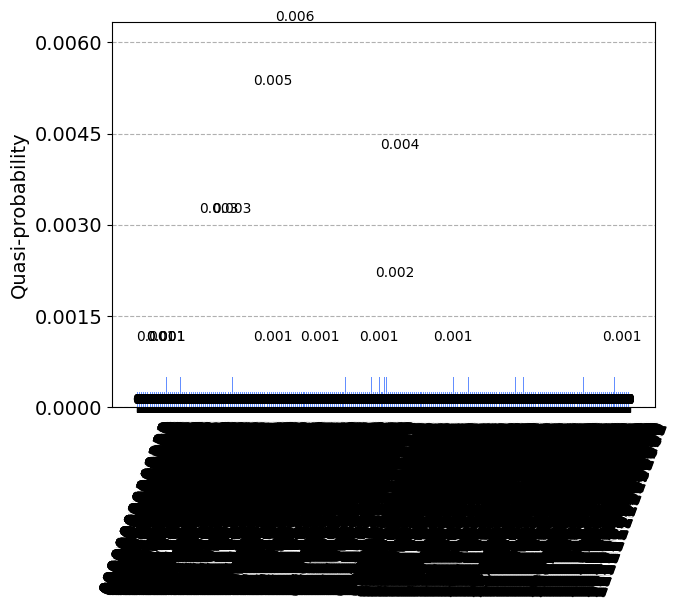

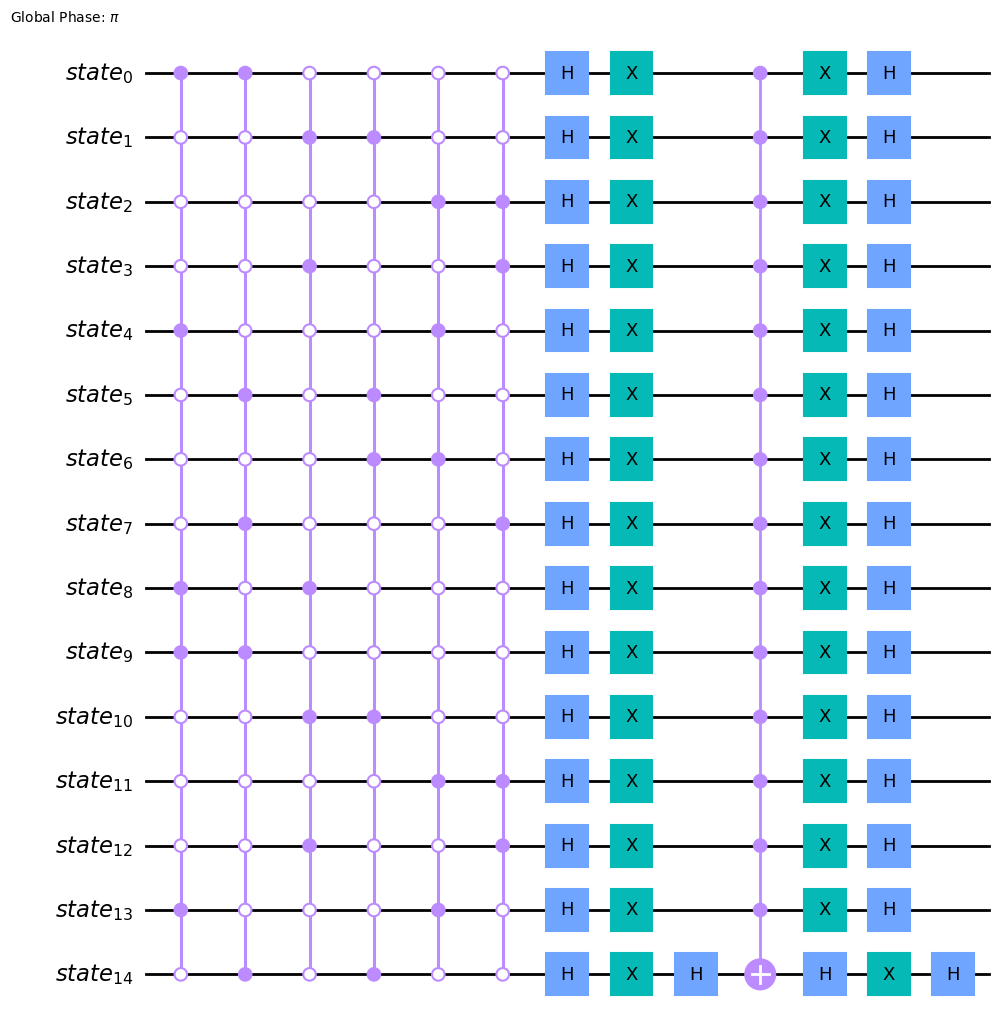

depth 13
width 15
max_mem 496.55859375 MiB
total_time 1125.7298035621643
avg_time 1125.7298035621643
std 1.5425257682800293
iter_times [1124.1872777938843]
times [(7.063250541687012, 1094.2141387462616, 22.90988779067993, 1124.1872777938843)]


In [1]:
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import PhaseOracle
from qiskit.primitives import BackendSampler
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_runtime import Sampler, Options
from qiskit import IBMQ
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
import time, math
from memory_profiler import memory_usage

count = 1
times = []
iter_times = []
epoch_time = time.time()

def main():
    for i in range(count):
        start_time = time.time()

        IBMQ.load_account()

        oracle = PhaseOracle.from_dimacs_file('data/grafo_regiões_mato_grosso.cnf')
        # oracle = PhaseOracle.from_dimacs_file('data/graphE.cnf')
        problem = AmplificationProblem(oracle)
        print("num_quibits", problem.grover_operator.num_qubits)
        sampler = Sampler(backend='ibmq_qasm_simulator', options={'max_execution_time': 10800})
        # iterations = Grover.optimal_num_iterations(num_solutions=12, num_qubits=oracle.num_qubits) 
        iterations = 5
        print("iterations", iterations)
        grover = Grover(iterations=iterations, sampler=sampler)
        circuit_time = time.time() - start_time
        result = grover.amplify(problem)
        result_time = time.time() - start_time - circuit_time

        # oracle = QuantumCircuit(2)
        # oracle.cz(0, 1, ctrl_state=0)
        # oracle.draw(output='text')

        # print(result.oracle_evaluation, result.top_measurement)
        print(result)
        print(result.circuit_results[0])
        # plot_histogram(result.circuit_results[0], figsize=(60,40))
        display(plot_histogram(result.circuit_results[0]))
        plot_time = time.time() - start_time - circuit_time - result_time
        iteration_time = time.time() - start_time
        times.append((circuit_time, result_time, plot_time, iteration_time))
        iter_times.append(iteration_time)

        # problem.oracle.decompose().draw(output='mpl')
        display(problem.grover_operator.decompose().draw(output='mpl'))
        print("depth", problem.grover_operator.decompose().depth())
        print("width", problem.grover_operator.decompose().width())
        # problem.grover_operator.decompose().qasm(formatted=True)
        # grover.construct_circuit(problem=problem).decompose(reps=2).draw(output='mpl')


        # array = []
        # array.append(('100010001', result.circuit_results[0]['100010001']))
        # array.append(('010001100', result.circuit_results[0]['010001100']))
        # array.append(('100001010', result.circuit_results[0]['100001010']))
        # array.append(('010100001', result.circuit_results[0]['010100001']))
        # array.append(('001100010', result.circuit_results[0]['001100010']))
        # array.append(('001010100', result.circuit_results[0]['001010100']))

        # print(array)
        # result_array = [round(x[1], 4) for x in array]
        # print(result_array)
        #array_to_latex(result_array, prefix="\\text{Statevector} = ", max_size=32)

max_mem = memory_usage(proc=main, interval=1, max_usage=True)
print("max_mem", max_mem, "MiB")

total_time = time.time() - epoch_time
avg_time = total_time / count
print("total_time", total_time)
print("avg_time", avg_time)

var = sum((i - avg_time) ** 2 for i in iter_times) / len(iter_times)
std = math.sqrt(var)
print("std", std)

print("iter_times", iter_times)
print("times", times)

